# ニューラルネットワーク


## 単層パーセプトロンの限界

- XOR演算を考える

|入力||出力|
|:--:|:--:|:--:|
|x1|x2|y|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|


- 重みは？

　　　　<img src="fig/xor.png" width="50%">

- 単層パーセプトロンは非線形の問題には対応できない。

## 多層ニューラルネットワーク

### 多層パーセプトロン

　　　　<img src="fig/xor_model.png" width="40%">

- s1でNAND（Not AND)、s2でORの計算、ｙではANDを行うことでXORを実現できる

### 多層ニューラルネットワーク　
- 線形分離できそうにないデータを2項分離してみる


#### テストデータの準備

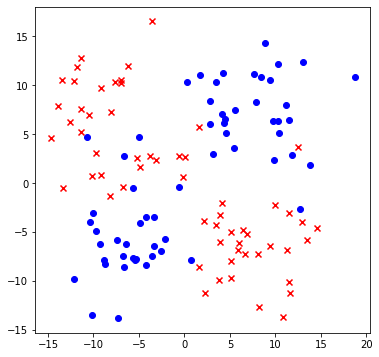

In [1]:
%matplotlib inline
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

data_set = pd.read_csv('https://www.lighthouselab.co.jp/p/anaconda/test_data2.csv',index_col=0)
data0 = data_set[data_set['t']==0]
data1 = data_set[data_set['t']==1]

fig = plt.figure(figsize=(6,6))
plt.scatter(data0.x1, data0.x2, c='r', marker='x')
plt.scatter(data1.x1, data1.x2, c='b',marker='o')
plt.show()

#### 計算モデル

　　　　<img src="fig/neuralnetwork.png" width="50%">

#### 活性化関数

　よく使われる活性化関数には以下のようなものがあります。
 
- シグモイド関数
$$
y={\frac {1}{ 1+e^{-x}}}
$$
- Relu関数(ランプ関数)
$$
y=max(0, x)=\left\{\begin{array}{l}0\;(x < 0)\\x\;(x>=0)\end{array}\right.
$$
- tanh関数
$$
y=tanh(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}
$$

　一般的に最終出力層ではシグモイド関数が、隠れ層では Relu関数やtanh関数が使われることが多いです。

![activation](fig/activation.png)


#### モデル定義

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

num_units = 2

model = Sequential()
model.add(Dense(units= num_units, input_shape=(2,),
                activation='tanh'))
model.add(Dense(units= 1, input_shape=(num_units,), 
                activation='sigmoid'))

model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy'])

### 計算実行

In [3]:
train_x = data_set[['x1','x2']].values
train_t = data_set[['t']].values

history = model.fit(
    train_x,
    train_t,
    epochs=10000,
    verbose=0
)

#### 結果の表示

In [4]:
score = model.evaluate(train_x,train_t,verbose=0)
print("Test score:",score[0])
print("Accuracy:",score[1])

Test score: 0.5056082606315613
Accuracy: 0.675000011920929


#### 図示

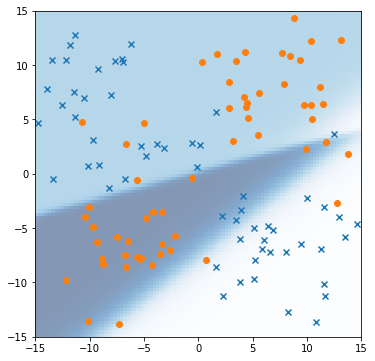

In [5]:
%matplotlib inline

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([-15,15])
subplot.set_xlim([-15,15])
subplot.scatter(data0.x1, data0.x2, marker='x')
subplot.scatter(data1.x1, data1.x2, marker='o')

locations = []
for x2 in np.linspace(-15,15,100):
    for x1 in np.linspace(-15,15,100):
        locations.append((x1,x2))
        

p_vals = model.predict(locations)
p_vals = p_vals.reshape((100,100))
subplot.imshow(p_vals, origin='lower', extent=(-15,15,-15,15),
               cmap=plt.cm.Blues, alpha=0.5)

#### 隠れ層を２層にして再実行
- それぞれの層のノード数は４

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

num_units1 = 4
num_units2 = 4

model2 = Sequential()
model2.add(Dense(units= num_units1, input_shape=(2,)
                 , activation='tanh'))
model2.add(Dense(units= num_units2, input_shape=(num_units1,)
                 , activation='tanh'))
model2.add(Dense(units= 1, input_shape=(num_units2,)
                 , activation='sigmoid'))



In [7]:
model2.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy'])


In [8]:
train_x = data_set[['x1','x2']].values
train_t = data_set[['t']].values

history = model2.fit(
    train_x,
    train_t,
    epochs=10000,
    verbose=0
)

In [9]:
score = model2.evaluate(train_x,train_t,verbose=0)
print("Test score:",score[0])
print("Accuracy:",score[1])

Test score: 0.14141502976417542
Accuracy: 0.9583333134651184


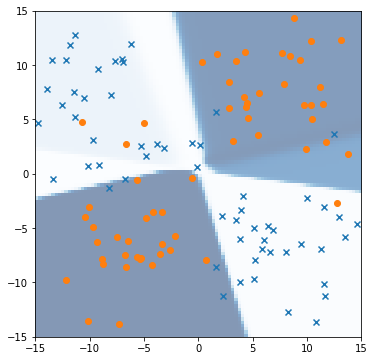

In [10]:
%matplotlib inline


fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([-15,15])
subplot.set_xlim([-15,15])
subplot.scatter(data0.x1, data0.x2, marker='x')
subplot.scatter(data1.x1, data1.x2, marker='o')

locations = []
for x2 in np.linspace(-30,30,100):
    for x1 in np.linspace(-15,15,100):
        locations.append((x1,x2))
p_vals = model2.predict(locations)
p_vals = p_vals.reshape((100,100))
subplot.imshow(p_vals, origin='lower', extent=(-15,15,-15,15),
               cmap=plt.cm.Blues, alpha=0.5)

## ニューラルネットワークの保存

　学習済みのニューラルネットワークを保存するには、保存する内容によっていくつかの方法があります。

### ネットワーク全体を保存->再読み込み

In [11]:
# フォルダを作成してその中に保存
model.save("my_model")

# 再読み込み
from tensorflow.keras.models import load_model
model_clone = load_model("my_model")

INFO:tensorflow:Assets written to: my_model/assets


In [13]:
# Keras H5 形式の単一ファイルに保存(上より保存できる情報が少し少なくなります)
model2.save("my_model2.h5")

# 再読み込み
from tensorflow.keras.models import load_model
model2_clone = load_model("my_model2.h5")

### モデルのアーキテクチャ(形状)と重みを別々に保存

In [15]:
# モデルのみを JSON 形式で保存
json = model.to_json()
with open("my_model_arch.json", "w") as f:
    f.write(json)

# 再読み込み
from tensorflow.keras.models import model_from_json
with open('my_model_arch.json', 'r') as f:
    json = f.read()
model_clone = model_from_json(json)

# model2 も同様に
json = model2.to_json()
with open("my_model2_arch.json", "w") as f:
    f.write(json)
with open('my_model2_arch.json', 'r') as f:
    json = f.read()
model2_clone = model_from_json(json)

In [16]:
# TensorFlow Checkpoint と呼ばれるいくつかのファイルのセットで重みを保存
model.save_weights("my_model_weights")

# Keras H5 形式の単一ファイルに重みを保存
model2.save_weights("my_model2_weights.h5")

# 再読み込み
model_clone.load_weights("my_model_weights")
model2_clone.load_weights("my_model2_weights.h5")

アーキテクチャや重みの保存ファイルには、.compile() で指定したlossやoptimizerの情報は含まれません。必要なら読み込んだモデルを再度 .compile() します。

## 誤差逆伝播

　勾配降下法を使うには、誤差関数の偏微分を求める必要がありますが、ニューラルネットワークではパラメータ数が多いため、偏微分を効率よく求めることが重要です。
 
　そこで、ある層の入力が前層の出力であるというニューラルネットワークの構造と、微分の公式(微分の線形性、合成関数の微分など)により、
出力側から入力側に向かって微分値を少しずつ伝搬するという手法が考えられました。これを **誤差逆伝播法** と呼びます。

　一方、微分値の伝搬の途中で、どこかの微分値が 0 になってしまうと、それ以降に伝搬される微分値も 0 となり、結果としてネットワークの学習がそこでストップしてしまいます。これを**勾配消失**といいます。

<img src="fig/backpropagation.png" width="80%" alt="backpropagation">

　TensorFlow では、ネットワークに入力を与えて計算したときに、誤差逆伝播に必要な計算も
 自動的に行います。
